<a href="https://colab.research.google.com/github/sparab2/MachineLearning/blob/main/Homework2Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/sparab2/MachineLearning/main/diabetes.csv')

In [ ]:
# separate features and target
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
# scale and standardize the features
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
# create k-fold cross-validation objects
kf5 = KFold(n_splits=5, shuffle=True, random_state=42)
kf10 = KFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
# initialize variables to store performance metrics
acc_scores_5 = []
prec_scores_5 = []
rec_scores_5 = []
conf_matrices_5 = []

acc_scores_10 = []
prec_scores_10 = []
rec_scores_10 = []
conf_matrices_10 = []

In [ ]:
# train and evaluate for k=5
for train_index, test_index in kf5.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # train the model
    model = LogisticRegression(random_state=42)
    model.fit(X_train, y_train)

    # make predictions on test set
    y_pred = model.predict(X_test)

    # calculate performance metrics
    acc_scores_5.append(accuracy_score(y_test, y_pred))
    prec_scores_5.append(precision_score(y_test, y_pred))
    rec_scores_5.append(recall_score(y_test, y_pred))
    conf_matrices_5.append(confusion_matrix(y_test, y_pred))


In [ ]:
# calculate average performance metrics for k=5
avg_acc_5 = sum(acc_scores_5) / len(acc_scores_5)
avg_prec_5 = sum(prec_scores_5) / len(prec_scores_5)
avg_rec_5 = sum(rec_scores_5) / len(rec_scores_5)
avg_conf_5 = sum(conf_matrices_5) / len(conf_matrices_5)

In [ ]:
print("K=5 results:")
print("Average accuracy:", avg_acc_5)
print("Average precision:", avg_prec_5)
print("Average recall:", avg_rec_5)
print("Average confusion matrix:\n", avg_conf_5)

K=5 results:
Average accuracy: 0.7682454800101859
Average precision: 0.7155969191270859
Average recall: 0.5726989972369619
Average confusion matrix:
 [[87.4 12.6]
 [23.  30.6]]


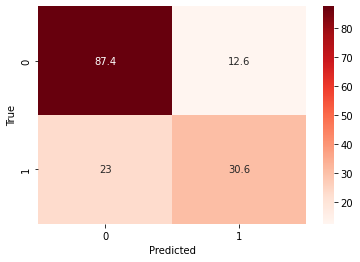

In [ ]:
# plot the confusion matrix for K=5 as a heatmap
sns.heatmap(avg_conf_5, annot=True, fmt='g', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# train and evaluate for k=10
for train_index, test_index in kf10.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # train the model
    model = LogisticRegression(random_state=42)
    model.fit(X_train, y_train)

    # make predictions on test set
    y_pred = model.predict(X_test)

    # calculate performance metrics
    acc_scores_10.append(accuracy_score(y_test, y_pred))
    prec_scores_10.append(precision_score(y_test, y_pred))
    rec_scores_10.append(recall_score(y_test, y_pred))
    conf_matrices_10.append(confusion_matrix(y_test, y_pred))

In [ ]:
# calculate average performance metrics for k=10
avg_acc_10 = sum(acc_scores_10) / len(acc_scores_10)
avg_prec_10 = sum(prec_scores_10) / len(prec_scores_10)
avg_rec_10 = sum(rec_scores_10) / len(rec_scores_10)
avg_conf_10 = sum(conf_matrices_10) / len(conf_matrices_10)

In [ ]:
print("K=10 results:")
print("Average accuracy:", avg_acc_10)
print("Average precision:", avg_prec_10)
print("Average recall:", avg_rec_10)
print("Average confusion matrix:\n", avg_conf_10)

K=10 results:
Average accuracy: 0.7707621326042378
Average precision: 0.7173983781918565
Average recall: 0.5800508774379741
Average confusion matrix:
 [[43.7  6.3]
 [11.3 15.5]]


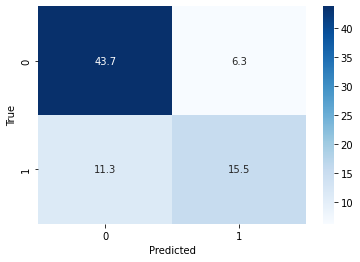

In [ ]:
# plot the confusion matrix for K=10 as a heatmap
sns.heatmap(avg_conf_10, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()